### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
importlib.reload(plt)
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

#1-
df_sort = df.sort_values(by= "total_litres_of_pure_alcohol", ascending=False)
df_sort.head(10)



,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
15,Belarus,142,373,42,14.4
98,Lithuania,343,244,56,12.9
3,Andorra,245,138,312,12.4
68,Grenada,199,438,28,11.9
61,France,127,151,370,11.8
45,Czech Republic,361,170,134,11.8
141,Russian Federation,247,326,73,11.5
99,Luxembourg,236,133,271,11.4
155,Slovakia,196,293,116,11.4
81,Ireland,313,118,165,11.4


In [9]:

#2-
df_sort.iloc[:,1:4].apply(np.mean, axis=0)


beer_servings      106.160622
spirit_servings     80.994819
wine_servings       49.450777
dtype: float64

In [8]:

#3-
df_sort["country"][df_sort["total_litres_of_pure_alcohol"] == np.max(df_sort["total_litres_of_pure_alcohol"])]


15    Belarus
Name: country, dtype: object

In [10]:

#4-
df_sort[df_sort["beer_servings"] > 100]


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
15,Belarus,142,373,42,14.4
98,Lithuania,343,244,56,12.9
3,Andorra,245,138,312,12.4
68,Grenada,199,438,28,11.9
61,France,127,151,370,11.8
...,...,...,...,...,...
29,Cabo Verde,144,56,16,4.0
170,Macedonia,106,27,86,3.9
20,Bolivia,167,41,8,3.8
146,Samoa,105,18,24,2.6


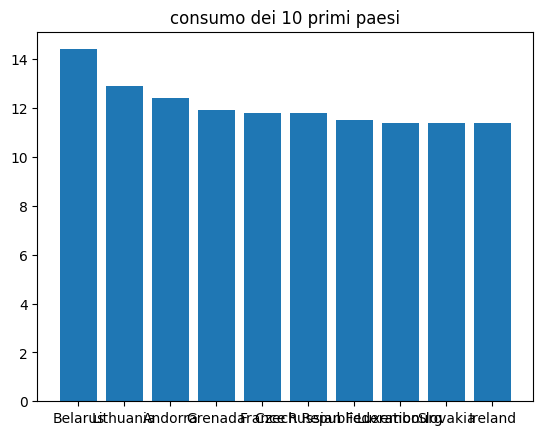

In [24]:

#5-

df_sort.iloc[:,0].head(10)
plt.bar(df_sort.iloc[:,0].head(10), df_sort.iloc[:,4].head(10))
plt.title ("consumo dei 10 primi paesi")
plt.show()


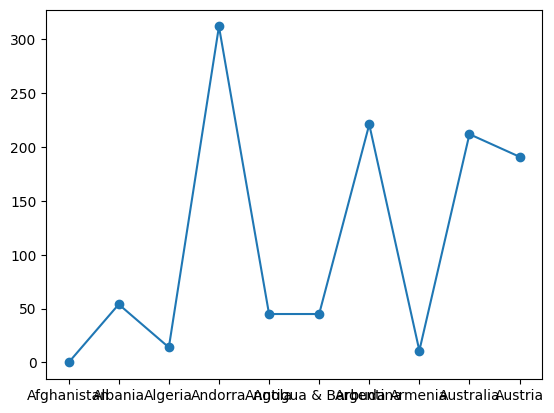

In [32]:

#6-
df_sort.sort_values(by="country", ascending=True)
df_X = df_sort.sort_values(by="country", ascending=True)
df_X.iloc[:,0]
plt.plot(df_X.iloc[:,0].head(10), df_X["wine_servings"].head(10), marker = 'o')



### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [9]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import missingno as msno    #per studiare i na
import importlib

importlib.reload(plt)

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#df.head()

np.sum(df.isna()) 
#df.isna().sum() 
df.info()


c:\Users\delma\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [10]:
#1-

df.isnull().mean()
media = df["salary_year_avg"].mean() 

df["salary_year_avg"] = df["salary_year_avg"].fillna(media.item())

stipendio_media = df.groupby("job_country")["salary_year_avg"].mean()
stipendio_media


job_country
Afghanistan    123286.274072
Albania        121445.359195
Algeria        121867.602467
Angola         123286.274072
Argentina      123220.069199
                   ...      
Venezuela      123286.274072
Vietnam        122549.013478
Yemen          123286.274072
Zambia         122972.656052
Zimbabwe       121203.696020
Name: salary_year_avg, Length: 160, dtype: float64

In [14]:

#2-
df["job_title_short"].value_counts()
df.groupby("job_country")["job_title_short"].count().reset_index()


,job_country,job_title_short
0,Afghanistan,16
1,Albania,119
2,Algeria,111
3,Angola,11
4,Argentina,8736
...,...,...
155,Venezuela,69
156,Vietnam,2414
157,Yemen,10
158,Zambia,104


In [36]:

#3-

intervallo = max(df["salary_year_avg"]) - min(df["salary_year_avg"])
intervallo


945000.0

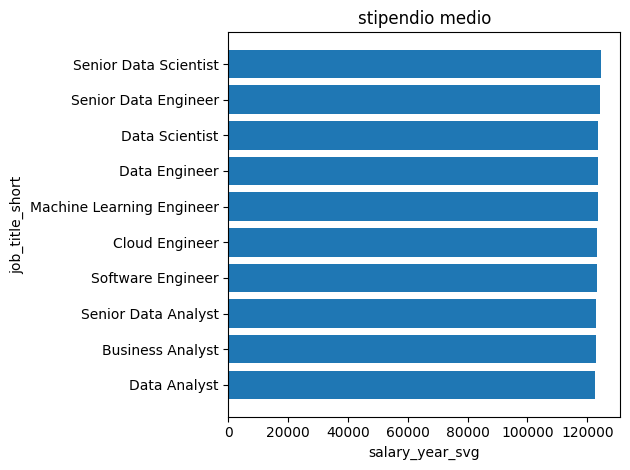

In [39]:

#4-
# df.sort_values(by="salary_year_avg", ascending=False)

# plt.barh(df["salary_year_avg"].head(10), df["job_title_short"].head(10))
salaire_moyen = df.groupby("job_title_short")["salary_year_avg"].mean().sort_values(ascending=False)
salaire_moyen
df["job_title_short"].value_counts()
plt.barh(salaire_moyen.index, salaire_moyen.values)

plt.xlabel("salary_year_svg")
plt.ylabel("job_title_short")
plt.title("stipendio medio")
plt.gca().invert_yaxis()  # pour afficher les salaires les plus élevés en haut
plt.tight_layout()
plt.show()